In [274]:
!pip install python-louvain


In [275]:
import csv
import networkx as nx
from collections import defaultdict
from networkx.algorithms.community import girvan_newman
import pandas as pd
import matplotlib.pyplot as plt
import community as community_louvain

In [276]:
# Read the CSV file
def read_csv(filename):
    data = []
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            data.append(row)
    return data

In [277]:
# Create a graph from the data
def create_graph(data):
    G = nx.Graph()
    for row in data:
        user_id = row[0]
        friends = row[9].split()
        G.add_node(user_id)
        for friend in friends:
            G.add_edge(user_id, friend)
    return G

In [278]:
# Apply community detection algorithm
def detect_communities_girvan_newman(G):
    communities_generator = girvan_newman(G)
    top_level_communities = next(communities_generator)
    return tuple(sorted(c) for c in top_level_communities)

In [279]:
def detect_communities_louvain(G):
    partition = community_louvain.best_partition(G)
    communities = defaultdict(list)
    for node, community_id in partition.items():
        communities[community_id].append(node)
    return tuple(sorted(c) for c in communities.values())

In [280]:
filename = 'data.csv'

In [281]:
data = read_csv(filename)[:501]

KeyboardInterrupt: 

In [ ]:
len(data[0])


10

In [ ]:
G = create_graph(data)

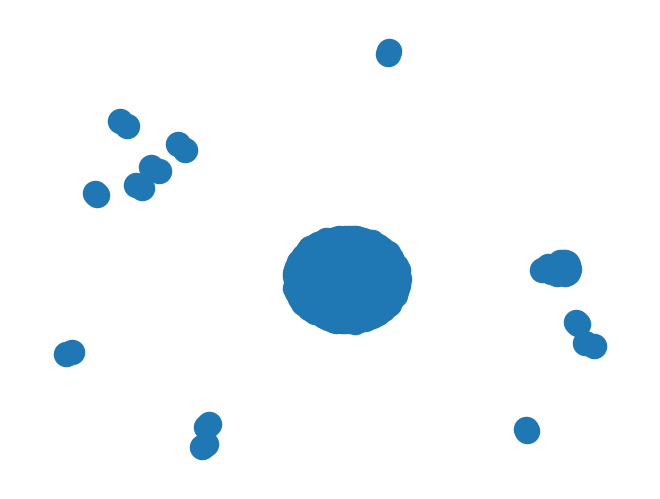

In [ ]:
nx.draw(G)


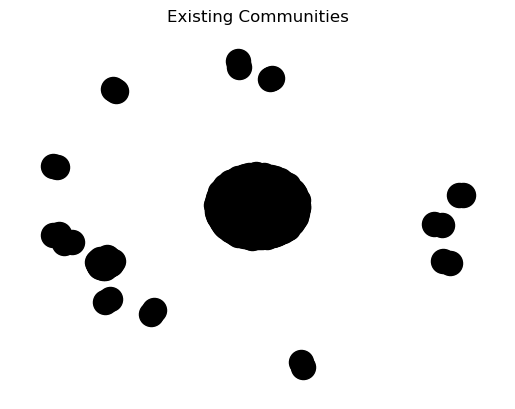

In [284]:
fig, ax = plt.subplots()
ax.set_title('Existing Communities')
ax.set_facecolor('lightgray')  # You can choose any color, such as lightgray, lightblue, etc.
nx.draw(G, ax=ax, node_color='black', edge_color='blue') # Customize node and edge colors as desired

plt.show()

In [ ]:
communities_girvan_newman = detect_communities_girvan_newman(G)

In [ ]:
communities_louvain = detect_communities_louvain(G)


In [ ]:
print("Detected Communities: Girvan_Newman")
for i, community in enumerate(communities_girvan_newman[1:]):
    print(f"Community {i + 1}: {community}")

Detected Communities: Girvan_Newman
Community 1: ['"1969574754"', '1969527638']
Community 2: ['"1017246240"', '"1020058453"', '"1020807216"', '"1023096199"', '"1024095475"', '"1028436787"', '"1035144882"', '"105327937"', '"1069656146"', '"108698830"', '"10909142"', '"1094559913"', '"109599001"', '"1102571228"', '"1116258164"', '"114606210"', '"1158468355"', '"1167564410"', '"1188445056"', '"1198406491"', '"120540009"', '"121254571"', '"124616906"', '"1266981150"', '"127719346"', '"1282836751"', '"130652973"', '"132137097"', '"132895423"', '"1347388483"', '"137111921"', '"1374375582"', '"1375018993"', '"1398973434"', '"14130366"', '"1419735180"', '"144221157"', '"144284168"', '"1455073058"', '"14645160"', '"1477570171"', '"14810162"', '"14855279"', '"151198065"', '"1520876749"', '"153511681"', '"15515919"', '"155705264"', '"15687962"', '"1571896093"', '"1572250478"', '"1583231011"', '"15887807"', '"160409181"', '"1608812798"', '"1623923521"', '"1664115324"', '"166767883"', '"16827333"',

In [ ]:
print("Detected Communities: Louvain")
for i, community in enumerate(communities_louvain[1:]):
    print(f"Community {i + 1}: {community}")

Detected Communities: Louvain
Community 1: ['"1969574754"', '1969527638']
Community 2: ['"109599001"', '"114606210"', '"1158468355"', '"127719346"', '"132895423"', '"137111921"', '"14130366"', '"1419735180"', '"14645160"', '"1520876749"', '"15515919"', '"1571896093"', '"1695288876"', '"18299708"', '"208211058"', '"2194592125"', '"2221021353"', '"223619463"', '"2248573141"', '"239672340"', '"24083901"', '"246850597"', '"25521487"', '"2805728862"', '"2805738157"', '"2847258711"', '"2939307108"', '"3030158859"', '"30892730"', '"30973"', '"317523246"', '"3399299419"', '"36746176"', '"4548105737"', '"45709328"', '"4631778074"', '"471972272"', '"488470307"', '"49381709"', '"546935775"', '"60789485"', '"70054190"', '"711274345620897792"', '"71245831"', '"718410366846386177"', '"720879348"', '"724683179332907009"', '"728354903165407234"', '"751362099838906368"', '"757792056207040513"', '"763323500576776192"', '"76535242"', '"765409300680351744"', '"765646413061562368"', '"765871267"', '"768927

In [ ]:
!pip install igraph

In [ ]:
from networkx.algorithms.community import label_propagation_communities

def detect_communities_label_propagation(G):
    communities = label_propagation_communities(G)
    return tuple(sorted(c) for c in communities)

communities_label_propagation = detect_communities_label_propagation(G)


In [ ]:
print("Detected Communities: Label Propagation")
for i, community in enumerate(communities_label_propagation[1:]):
    print(f"Community {i + 1}: {community}")

Detected Communities: Label Propagation
Community 1: ['"1969574754"', '1969527638']
Community 2: ['"380787323"', '"3996310033"', '"45709328"', '1187590927', '137594386', '2194765327', '4656527605', '710296241251287040', '729716562056249344', '750314805085417472', '78230240', '[']
Community 3: ['"60789485"', '51878493']
Community 4: ['"86868062"', '1393409100']
Community 5: ['"361335082"', '232891415']
Community 6: ['"1571896093"', '710130422907207680']
Community 7: ['"2401096388"', '3649469655']
Community 8: ['"16874201"', '99769502']
Community 9: ['"2353374818"', '413415713']
Community 10: ['"2432417994"', '518053777']
Community 11: ['"386533263"', '3167964531']
Community 12: ['"3072390181"', '634516322']
Community 13: ['"2395608518"', '3157134163']
Community 14: ['"17082836"', '1852404296']
Community 15: ['"634734888"', '320733081']
Community 16: ['"30892730"', '611525786']
Community 17: ['"2835941210"', '451819350']
Community 18: ['"2218719389"', '465857810']
Community 19: ['"283011

In [ ]:
import networkx.algorithms.community as nx_comm

def detect_communities_fast_greedy(G):
    communities = nx_comm.greedy_modularity_communities(G)
    return tuple(sorted(c) for c in communities)

communities_fast_greedy = detect_communities_fast_greedy(G)


In [ ]:
print("Detected Communities: Fast Greedy")
for i, community in enumerate(communities_fast_greedy[1:]):
    print(f"Community {i + 1}: {community}")

Detected Communities: Fast Greedy
Community 1: ['1282070173', '186519621', '1973262552', '2159892348', '2340272625', '2580377551', '263316619', '277759851', '2877586418', '2898726941', '3002349627', '3437056701', '3518961674', '506237569', '703651394822270976', '709037473209454592', '716832511821615104', '729086055274582016', '731223079955795968', '732645396418297858', '738903193', '75334422', '755555729923117057', '764119663148081153', '79896923', '799333531', '857115170', '952818067', '[]']
Community 2: ['friends', 'id']
Community 3: ['"1969574754"', '1969527638']
Community 4: ['"60789485"', '51878493']
Community 5: ['"361335082"', '232891415']
Community 6: ['"1571896093"', '710130422907207680']
Community 7: ['"2401096388"', '3649469655']
Community 8: ['"16874201"', '99769502']
Community 9: ['"2353374818"', '413415713']
Community 10: ['"2432417994"', '518053777']
Community 11: ['"386533263"', '3167964531']
Community 12: ['"3072390181"', '634516322']
Community 13: ['"2395608518"', '31

In [ ]:
def detect_communities_clauset_newman_moore(G):
    communities = nx_comm.girvan_newman(G)
    return tuple(sorted(c) for c in next(communities))

communities_clauset_newman_moore = detect_communities_clauset_newman_moore(G)


In [ ]:
print("Detected Communities: Clauset Newman Moore")
for i, community in enumerate(communities_clauset_newman_moore[1:]):
    print(f"Community {i + 1}: {community}")

Detected Communities: Clauset Newman Moore
Community 1: ['"1969574754"', '1969527638']
Community 2: ['"1017246240"', '"1020058453"', '"1020807216"', '"1023096199"', '"1024095475"', '"1028436787"', '"1035144882"', '"105327937"', '"1069656146"', '"108698830"', '"10909142"', '"1094559913"', '"109599001"', '"1102571228"', '"1116258164"', '"114606210"', '"1158468355"', '"1167564410"', '"1188445056"', '"1198406491"', '"120540009"', '"121254571"', '"124616906"', '"1266981150"', '"127719346"', '"1282836751"', '"130652973"', '"132137097"', '"132895423"', '"1347388483"', '"137111921"', '"1374375582"', '"1375018993"', '"1398973434"', '"14130366"', '"1419735180"', '"144221157"', '"144284168"', '"1455073058"', '"14645160"', '"1477570171"', '"14810162"', '"14855279"', '"151198065"', '"1520876749"', '"153511681"', '"15515919"', '"155705264"', '"15687962"', '"1571896093"', '"1572250478"', '"1583231011"', '"15887807"', '"160409181"', '"1608812798"', '"1623923521"', '"1664115324"', '"166767883"', '"1682

In [ ]:
!pip install leidenalg

In [ ]:
from igraph import Graph
import leidenalg as la


def nx_to_igraph(G):
    ig_g = Graph.Adjacency((nx.to_numpy_array(G) > 0).tolist())
    ig_g.vs['name'] = list(G.nodes())
    return ig_g
import leidenalg as la

def detect_communities_leiden(G):
    ig_g = nx_to_igraph(G)
    partition = la.find_partition(ig_g, la.ModularityVertexPartition)
    communities = defaultdict(list)
    for node, community_id in zip(ig_g.vs['name'], partition.membership):
        communities[community_id].append(node)
    return tuple(sorted(c) for c in communities.values())

communities_leiden = detect_communities_leiden(G)



In [ ]:
print("Detected Communities: Leiden")
for i, community in enumerate(communities_leiden[1:]):
    print(f"Community {i + 1}: {community}")

Detected Communities: Leiden
Community 1: ['"1969574754"', '1969527638']
Community 2: ['"1020058453"', '"108698830"', '"1116258164"', '"14855279"', '"17082836"', '"1970745259"', '"1971329089"', '"1973782416"', '"1974432440"', '"19917537"', '"20900209"', '"2271124062"', '"234428224"', '"235884737"', '"239158918"', '"2466044939"', '"2510901576"', '"2653974967"', '"299776583"', '"3029006867"', '"3030158859"', '"3091486882"', '"3110073460"', '"318464243"', '"3213991349"', '"3281115164"', '"3284112337"', '"389963979"', '"3941580014"', '"43042353"', '"45709328"', '"465033419"', '"46597488"', '"4754316914"', '"4777549400"', '"48592696"', '"496314365"', '"518574152"', '"536974996"', '"582189103"', '"62513246"', '"69620713"', '"703905115841961984"', '"706860055568752640"', '"709470503715606528"', '"71245831"', '"734193888592695296"', '"739836760948117504"', '"741432883575803904"', '"742535954343329792"', '"750664219188686848"', '"757792056207040513"', '"759070963686178816"', '"76724984557273088

In [ ]:
from collections import defaultdict

communities = {
    'girvan_newman': communities_girvan_newman,
    'louvain': communities_louvain,
    'label_propagation': communities_label_propagation,
    'fast_greedy': communities_fast_greedy,
    'clauset_newman_moore': communities_clauset_newman_moore,
    'leiden': communities_leiden
}

for name, community in communities.items():
    counts = defaultdict(int)
    for sublist in community:
        counts[len(sublist)] += 1

    print(f"{name}:")
    for size, count in counts.items():

        print(f"Communities with {size} members: {count}")
    print()


girvan_newman:
Communities with 2 members: 13
Communities with 916 members: 1
Communities with 29 members: 1

louvain:
Communities with 2 members: 407
Communities with 121 members: 1
Communities with 29 members: 1
Communities with 3 members: 1
Communities with 4 members: 1

label_propagation:
Communities with 2 members: 465
Communities with 12 members: 1
Communities with 29 members: 1

fast_greedy:
Communities with 118 members: 1
Communities with 29 members: 1
Communities with 2 members: 412

clauset_newman_moore:
Communities with 2 members: 13
Communities with 916 members: 1
Communities with 29 members: 1

leiden:
Communities with 2 members: 407
Communities with 121 members: 1
Communities with 29 members: 1
Communities with 3 members: 1
Communities with 4 members: 1

